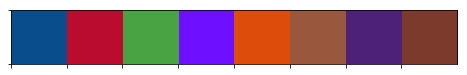

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("paper", font_scale=1.5)
flatui = ["#0a4d8c", "#ba0c2f", "#49a343", "#6E10FF", "#DE4C0B", "#99583D", "#4d2177", "#7c3a2d"]
# https://color.adobe.com/zh/create/color-wheel/?basfrom matplotlib import rc
sns.palplot(flatui)

In [2]:
!ls

data				potts.py
errors_151020_20_100000.csv	potts.py.lprof
errors_151020_20_500000.csv	potts_video.py
Gibbs_errors_10_20_1000000.csv	potts_video.py.lprof
Gibbs_potts.py			run.sh
Marginals_50.pdf		test.py
MGPMH_errors_10_20_1000000.csv	VaryTemp_Gibbs_errors_10_20_1000000.csv
plott_potts.ipynb		VaryTemp_MGPMH_errors_10_20_1000000.csv


In [23]:
error = np.genfromtxt('MGPMH_errors_10_20_1000000.csv',delimiter=',')

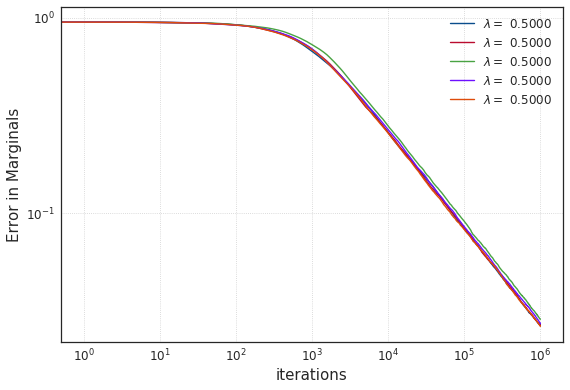

In [56]:
import matplotlib.lines as lines
with sns.axes_style("white"):
    fig = plt.figure(figsize=(8, 5.5))
    ax  = fig.add_subplot(111)
    plt.yscale('log')
    plt.xscale('log')
    for i in range(error.shape[0]):
        line = error[i,1:]
        plt.plot(line,color=flatui[i],label="$\lambda = $ {0:.4f}".format(error[i,0]))

    plt.xlabel("iterations", size=15)
    plt.ylabel("Error in Marginals", size=15)
#     plt.title('50 by 50 Potts model')
    plt.legend(loc='upper right')
    plt.grid(linestyle='dotted')
    plt.tight_layout(pad=1, w_pad=1, h_pad=1)

    plt.savefig("Marginals_{}.pdf".format('50'), bbox_inches='tight')
    plt.show()

In [2]:
error = np.genfromtxt('MGPMH_errors_10_20_1000000.csv',delimiter=',')

In [3]:
gibbs_error = np.genfromtxt('Gibbs_errors_10_20_1000000.csv',delimiter=',')

In [7]:
error[:,0]

array([  75.94406879,    1.51888138,   60.75525503,   30.37762752,
        113.91610319])

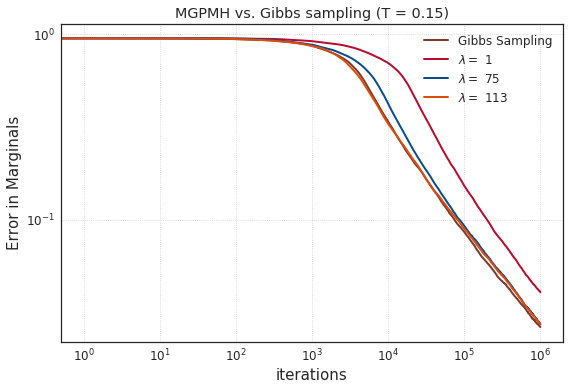

In [8]:
import matplotlib.lines as lines
with sns.axes_style("white"):
    fig = plt.figure(figsize=(8, 5.5))
    ax  = fig.add_subplot(111)
    plt.yscale('log')
    plt.xscale('log')
    for i in range(1):
        line = gibbs_error[1:]
        plt.plot(line,color=flatui[-1],linewidth=2,label="Gibbs Sampling".format(i))
    pl = [1,0,4]
    for i in pl:
        line = error[i,1:]
        plt.plot(line,color=flatui[i],linewidth=2,label="$\lambda = $ {:d}".format(int(error[i,0])))
    plt.xlabel("iterations", size=15)
    plt.ylabel("Error in Marginals", size=15)
    plt.title('MGPMH vs. Gibbs sampling (T = 0.15)')
    plt.legend(loc='upper right')
    plt.grid(linestyle='dotted')
    plt.tight_layout(pad=1, w_pad=1, h_pad=1)

    plt.savefig("Marginals_{}.pdf".format('50'), bbox_inches='tight')
    plt.show()

In [80]:
!ls

Gibbs_errors_10_20_1000000.csv errors_5_50.csv
Gibbs_potts.py                 errors_5_50_100000.csv
MGPMH_errors_10_20_1000000.csv plott_potts.ipynb
Marginals_50.pdf               potts.py
errors1_5.csv                  potts.py.lprof
errors_151020_20_100000.csv    potts_video.py
errors_151020_20_1000000.csv   potts_video.py.lprof
errors_151020_20_500000.csv    run.sh
errors_151020_50_1000.csv      test.py


In [2]:
t1 = np.genfromtxt('VaryTemp_MGPMH_errors_10_20_1000000.csv',delimiter=',')

In [3]:
t2 = np.genfromtxt('VaryTemp_Gibbs_errors_10_20_1000000.csv',delimiter=',')

In [27]:
.7/1.5**2

0.3111111111111111

In [7]:
t2.shape

(6, 1000000)

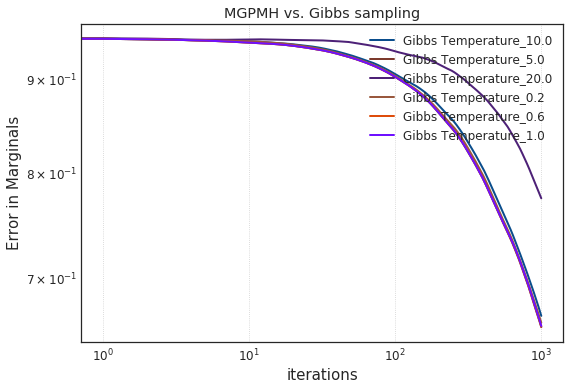

In [44]:
import matplotlib.lines as lines
with sns.axes_style("white"):
    fig = plt.figure(figsize=(8, 5.5))
    ax  = fig.add_subplot(111)
    plt.yscale('log')
    plt.xscale('log')
#     for i in range(6):
#         line = t1[i,1:1000]
#         plt.plot(line,color=flatui[i],linewidth=2,label="Temperature_{}".format(t1[i,0]))

    for i in range(6):
        line = t2[i,1:1000]
        plt.plot(line,color=flatui[-i],linewidth=2,label="Gibbs Temperature_{}".format(t1[i,0]))
    plt.xlabel("iterations", size=15)
    plt.ylabel("Error in Marginals", size=15)
    plt.title('MGPMH vs. Gibbs sampling')
    plt.legend(loc='upper right')
    plt.grid(linestyle='dotted')
    plt.tight_layout(pad=1, w_pad=1, h_pad=1)

    plt.savefig("Marginals_{}.pdf".format('50'), bbox_inches='tight')
    plt.show()